In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px

%matplotlib inline

In [76]:
df = pd.read_csv('cinema_successful_orders.csv', sep=';')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,order_id,creation_date,session_date,movie_id,movie_name,movie_duration,movie_age_restriction,movie_rating,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fairy_tale,genre_is_science,genre_is_fantasy,genre_is_historical,genre_is_drama,genre_is_animation,genre_is_cartoon,genre_is_documentary,genre_is_adventure,genre_is_fiction,genre_is_childish,genre_is_horror,genre_is_humor,genre_is_western,genre_is_noir,genre_is_detective,genre_is_biography,genre_is_criminal,genre_is_tragicomedy,genre_is_biopic,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,number_of_tickets,places,sales_in_cu,ticket_price_in_cu,cinema_name,cinema_address,cinema_latitude,cinema_longitude,cinema_city,client_id
0,2441412,2020-03-07,2020-03-07,32452,Маленькие женщины,135,12+,"7,7","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0",2,"ряд 5, место 6, ряд 5, место 5","63,29113924050633","31,645569620253166",Каро 10 Щука,"ул. Щукинская, д. 42",55.809469,37.464571,Москва,12419121665619114461
1,2169133,2020-02-03,2020-02-04,32452,Маленькие женщины,135,12+,"7,7","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0",4,"ряд 15, место 31, ряд 15, место 32, ряд 15, ме...","189,873417721519","47,46835443037975",Каро 11 Октябрь,"ул. Новый Арбат, д. 24",55.753338,37.587615,Москва,8470824369879098013
2,2187694,2020-02-06,2020-02-06,32452,Маленькие женщины,135,12+,"7,7","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0",2,"ряд 8, место 8, ряд 8, место 9","47,46835443037975","23,734177215189874",Ретро,"ул. Ленина, д. 41",58.634768,59.783538,Лесной,8691480233029300973
3,2182225,2020-02-05,2020-02-05,32452,Маленькие женщины,135,12+,"7,7","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0",2,"ряд 8, место 6, ряд 8, место 5","47,46835443037975","23,734177215189874",Каро 9 Континент на Звездной,"ул. Ленсовета, 97",59.832425,30.348585,Санкт-Петербург,16386655971521120416
4,2209967,2020-02-08,2020-02-12,32452,Маленькие женщины,135,12+,"7,7","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0",3,"ряд 5, место 13, ряд 5, место 12, ряд 5, место 11","132,91139240506328","44,30379746835443",Каро 7 Атриум,"ул. Земляной вал, 33",55.757214,37.658941,Москва,9606322045446303245


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525271 entries, 0 to 525270
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               525271 non-null  int64  
 1   creation_date          525271 non-null  object 
 2   session_date           525271 non-null  object 
 3   movie_id               525271 non-null  int64  
 4   movie_name             525271 non-null  object 
 5   movie_duration         521989 non-null  object 
 6   movie_age_restriction  523648 non-null  object 
 7   movie_rating           525271 non-null  object 
 8   genre_is_triller       525188 non-null  object 
 9   genre_is_military      525188 non-null  object 
 10  genre_is_action        525188 non-null  object 
 11  genre_is_biographical  525188 non-null  object 
 12  genre_is_fairy_tale    525188 non-null  object 
 13  genre_is_science       525188 non-null  object 
 14  genre_is_fantasy       525188 non-nu

In [6]:
ticket_number = df \
    .groupby('movie_name', as_index=False) \
    .agg({'number_of_tickets': 'sum'}) \
    .sort_values('number_of_tickets', ascending=False)

In [7]:
ticket_number[ticket_number['number_of_tickets'] > 5]

,movie_name,number_of_tickets
413,Джентльмены,162159
423,Довод,115946
1134,Холоп,92766
578,Лёд 2,48773
19,1917,43243
...,...,...
136,RSC: Тимон Афинский,6
137,Riverdance,6
777,Новый баухаус: Жизнь и наследие Ласло Мохой-Надя,6
1108,Феллини. Столетие: Амаркорд,6


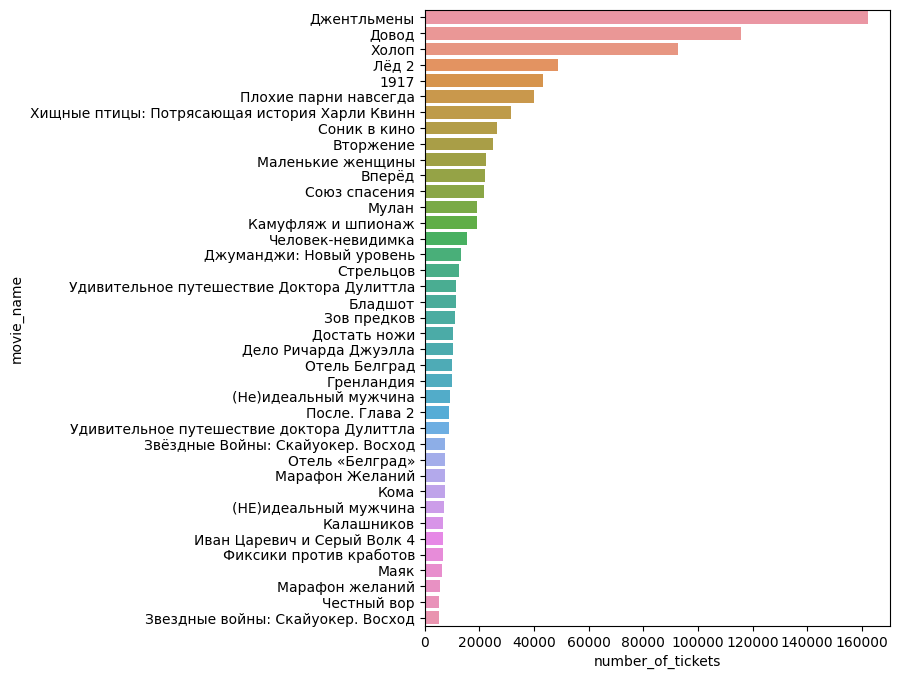

In [9]:
plt.figure(figsize=(6, 8))
sns.barplot(data=ticket_number[ticket_number['number_of_tickets'] > 5000], y='movie_name', x='number_of_tickets');

In [576]:
df.movie_name.mode()[0]

'Джентльмены'

In [103]:
# приводим жанры к булевым (0, 1)
# это сработало, причем БЫСТРО!!!

for i in df.iloc[:, 8:36]:
    df[i] = df[i].str.replace(',', '.')
    df[i] = df[i].astype(float).fillna(0).astype(np.int64)
df.iloc[:, 8:36]

,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fairy_tale,genre_is_science,genre_is_fantasy,genre_is_historical,genre_is_drama,genre_is_animation,genre_is_cartoon,genre_is_documentary,genre_is_adventure,genre_is_fiction,genre_is_childish,genre_is_horror,genre_is_humor,genre_is_western,genre_is_noir,genre_is_detective,genre_is_biography,genre_is_criminal,genre_is_tragicomedy,genre_is_biopic,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525266,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
525267,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
525268,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
525269,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [115]:
# приводит столбцы с датами в тип datetime

for col in df.iloc[:,1:3]:
    df[col] = pd.to_datetime(df[col])

In [231]:
df2 = df.copy()

In [232]:
# Места разбиваем

df2['places'] = df2['places'].str.replace('ряд |место ', '')

table = df2['places'].str.split(',', expand=True)
table = table.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

for index in range(table.shape[1]):
    if index == 10:
        print()
    if index%2 == 0:
        df2['place_row_' + str(int(math.floor(index/2)))] = table[index]
    else:
        df2['place_seat_' + str(int(math.floor(index/2)))] = table[index]
df2

C:\Users\Temich\AppData\Local\Temp\ipykernel_8656\3015300127.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['places'] = df2['places'].str.replace('ряд |место ', '')


,order_id,creation_date,session_date,movie_id,movie_name,movie_duration,movie_age_restriction,movie_rating,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fairy_tale,genre_is_science,genre_is_fantasy,genre_is_historical,genre_is_drama,genre_is_animation,genre_is_cartoon,genre_is_documentary,genre_is_adventure,genre_is_fiction,genre_is_childish,genre_is_horror,genre_is_humor,genre_is_western,genre_is_noir,genre_is_detective,genre_is_biography,genre_is_criminal,genre_is_tragicomedy,genre_is_biopic,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,number_of_tickets,places,sales_in_cu,ticket_price_in_cu,cinema_name,cinema_address,cinema_latitude,cinema_longitude,cinema_city,client_id,place_row_0,place_seat_0,place_row_1,place_seat_1,place_row_2,place_seat_2,place_row_3,place_seat_3,place_row_4,place_seat_4,place_row_5,place_seat_5
0,2441412,2020-03-07,2020-03-07,32452,Маленькие женщины,135,12+,"7,7",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,"5, 6, 5, 5","63,29113924050633","31,645569620253166",Каро 10 Щука,"ул. Щукинская, д. 42",55.809469,37.464571,Москва,12419121665619114461,5,6,5,5,0,0,0,0,0,0,0,0
1,2169133,2020-02-03,2020-02-04,32452,Маленькие женщины,135,12+,"7,7",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,"15, 31, 15, 32, 15, 33, 15, 34","189,873417721519","47,46835443037975",Каро 11 Октябрь,"ул. Новый Арбат, д. 24",55.753338,37.587615,Москва,8470824369879098013,15,31,15,32,15,33,15,34,0,0,0,0
2,2187694,2020-02-06,2020-02-06,32452,Маленькие женщины,135,12+,"7,7",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,"8, 8, 8, 9","47,46835443037975","23,734177215189874",Ретро,"ул. Ленина, д. 41",58.634768,59.783538,Лесной,8691480233029300973,8,8,8,9,0,0,0,0,0,0,0,0
3,2182225,2020-02-05,2020-02-05,32452,Маленькие женщины,135,12+,"7,7",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,"8, 6, 8, 5","47,46835443037975","23,734177215189874",Каро 9 Континент на Звездной,"ул. Ленсовета, 97",59.832425,30.348585,Санкт-Петербург,16386655971521120416,8,6,8,5,0,0,0,0,0,0,0,0
4,2209967,2020-02-08,2020-02-12,32452,Маленькие женщины,135,12+,"7,7",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,"5, 13, 5, 12, 5, 11","132,91139240506328","44,30379746835443",Каро 7 Атриум,"ул. Земляной вал, 33",55.757214,37.658941,Москва,9606322045446303245,5,13,5,12,5,11,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525266,2289826,2020-02-17,2020-02-17,36247,Джентльмены,113,18+,"0,0",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,"6, 5, 6, 6","75,9493670886076","37,9746835443038",Формула Кино Лефортово,"ш. Энтузиастов, 12, корп. 2, ТК «Город Лефортово»",55.747385,37.707076,Москва,15376387967092078428,6,5,6,6,0,0,0,0,0,0,0,0
525267,2284126,2020-02-16,2020-02-16,36247,Джентльмены,113,18+,"0,0",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,"11, 16","77,53164556962025","77,53164556962025",Киномакс-Мозаика,"7-я Кожуховская, 9, ТРК «Мозаика»",55.710639,37.674466,Москва,18201133101467231081,11,16,0,0,0,0,0,0,0,0,0,0
525268,2371205,2020-02-25,2020-02-25,36247,Джентльмены,113,18+,"0,0",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,"9, 15, 9, 16","56,962025316455694","28,481012658227847",Балтика,"Сходненская, 56, ТРЦ «Калейдоскоп»",55.850661,37.444295,Москва,10753400401096512686,9,15,9,16,0,0,0,0,0,0,0,0
525269,2371601,2020-02-25,2020-02-25,36247,Джентльмены,113,18+,"0,0",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,"3, 9, 3, 8","47,46835443037975","23,734177215189874",Синема Парк Гранд Каньон,"просп. Энгельса, 154, «Гранд Каньон»",60.058087,30.334233,Санкт-Петербург,7148845257742510639,3,9,3,8,0,0,0,0,0,0,0,0


In [217]:
df2['number_of_tickets'].unique()

array([2, 4, 3, 1, 5, 6], dtype=int64)

In [252]:
max_number_of_tickets = df2['number_of_tickets'].max()
max_number_of_tickets

6

In [273]:
####### тестовая дичь

# hall_size = df2 \
#     .groupby('cinema_name')
# max_seat = 0
# max_row = 0
# list_2 = []
# for name, group in hall_size:
#     max_seat = 0
#     max_row = 0
#     list_1 = []
#     for group_rows in range(group.shape[0]):
#         list_1.append(0)
        
#         for number_of_ticket in range(max_number_of_tickets):
    
#             for place_seat in group['place_seat_'+str(number_of_ticket)]:
#                 if place_seat > list_1[group_rows]:
#                     list_1[group_rows] = place_seat
# #         if group['place_row_'+str(index)] > max_row:
# #             max_row = group['place_row_'+str(index)]  
# #     hall_size['max_row'] = max_row
#     list_2.append(list_1)
# hall_size['max_seat'] = pd.Series(list_2)
# hall_size

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Temich\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Temich\AppData\Local\Temp\ipykernel_8656\891406709.py", line -1, in <module>
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Temich\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Temich\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\ultratb.py", line 1288, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Temich\AppData\Local\Programs\Python\Python311\Lib\site-p

In [249]:
hall_size.columns = [' '.join(col).strip() for col in hall_size.columns.values]

In [251]:
hall_size.sort_values('number_of_tickets max', ascending=False)

,cinema_name,number_of_tickets max,place_row_0 min,place_row_0 max,place_seat_0 min,place_seat_0 max
226,Каро 5 на Байконурской,6,1,12,1,32
271,Кинозал МБУК Жуковский районный Дом культуры,6,2,6,5,10
585,Премьер Зал Знамя,6,1,13,1,10
586,Премьер Зал Омега,6,1,7,1,16
279,Кинокомплекс CinemaV,6,1,10,1,20
...,...,...,...,...,...,...
588,Премьер Зал Сан Сити (Троицк),1,6,6,5,5
432,Люксор в ТРК Лето,1,4,4,7,7
95,АвтоКАРО под звездами: МЕГА Екатеринбург,1,0,0,0,0
98,Автокинотеатр «ДКЖ-кино»,1,2,3,4,4


In [384]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525271 entries, 0 to 525270
Data columns (total 58 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   order_id               525271 non-null  int64         
 1   creation_date          525271 non-null  datetime64[ns]
 2   session_date           525271 non-null  datetime64[ns]
 3   movie_id               525271 non-null  int64         
 4   movie_name             525271 non-null  object        
 5   movie_duration         521989 non-null  object        
 6   movie_age_restriction  523648 non-null  object        
 7   movie_rating           525271 non-null  float64       
 8   genre_is_triller       525271 non-null  int64         
 9   genre_is_military      525271 non-null  int64         
 10  genre_is_action        525271 non-null  int64         
 11  genre_is_biographical  525271 non-null  int64         
 12  genre_is_fairy_tale    525271 non-null  int6

In [322]:
# сделали movie_rating типом float

df2.movie_rating = df2.movie_rating.str.replace(',', '.').astype(float)

In [376]:
df2.movie_duration =  df2.movie_duration.str.replace(' мин.', '').astype(int, errors='ignore')

TypeError: unsupported operand type(s) for |: 'str' and 'str'

In [313]:
def duration_to_int(series):
    for element in series:
        if element.isdigit():
            element = int(element)
        else:
            element = None
    return series

In [315]:
df2['movie_duration'].apply(duration_to_int)

TypeError: 'float' object is not iterable

In [278]:
# приводим sales_in_cu в вид рубли, копейки

df2.sales_in_cu = df2.sales_in_cu.str.replace(',', '.').astype(float).round(2)

In [280]:
# приводим ticket_price_in_cu в вид рубли, копейки

df2.ticket_price_in_cu = df2.ticket_price_in_cu.str.replace(',', '.').astype(float).round(2)

# Нормальная аналитика

In [340]:
df2.head(1)

,order_id,creation_date,session_date,movie_id,movie_name,movie_duration,movie_age_restriction,movie_rating,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fairy_tale,genre_is_science,genre_is_fantasy,genre_is_historical,genre_is_drama,genre_is_animation,genre_is_cartoon,genre_is_documentary,genre_is_adventure,genre_is_fiction,genre_is_childish,genre_is_horror,genre_is_humor,genre_is_western,genre_is_noir,genre_is_detective,genre_is_biography,genre_is_criminal,genre_is_tragicomedy,genre_is_biopic,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,number_of_tickets,places,sales_in_cu,ticket_price_in_cu,cinema_name,cinema_address,cinema_latitude,cinema_longitude,cinema_city,client_id,place_row_0,place_seat_0,place_row_1,place_seat_1,place_row_2,place_seat_2,place_row_3,place_seat_3,place_row_4,place_seat_4,place_row_5,place_seat_5
0,2441412,2020-03-07,2020-03-07,32452,Маленькие женщины,135,12+,7.7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,"5, 6, 5, 5",63.29,31.65,Каро 10 Щука,"ул. Щукинская, д. 42",55.809469,37.464571,Москва,12419121665619114461,5,6,5,5,0,0,0,0,0,0,0,0


In [358]:
ratings = df2 \
    .groupby('movie_rating', as_index=False) \
    .agg({'movie_id': 'nunique'}) \
    .rename(columns={'movie_id': 'rating_count'})

In [383]:
# убрали рейтинги, которые встречются меньше 3 раз и рейтинг 0
# чтобы выбросы не влияли на среднее и медиану

filtered_ratings = ratings.query('rating_count > 2 and movie_rating != 0')
filtered_ratings

,movie_rating,rating_count
6,4.20,4
8,4.45,3
10,4.55,3
13,4.80,3
15,4.90,5
...,...,...
83,8.30,9
85,8.40,8
86,8.50,3
89,8.70,5


In [423]:
# посмотрим на то, как распределена наша прибыль с каждого билета по кинотеатрам

revenue_per_ticket_by_cinema = df2 \
    .groupby(['cinema_city', 'cinema_name'], as_index=False) \
    .agg({'order_id': 'nunique', 'number_of_tickets': 'sum', 'ticket_price_in_cu': ['mean', 'min', 'max'], 'sales_in_cu': ['mean', 'min', 'max']}) \
    .round(2)

In [425]:
revenue_per_ticket_by_cinema.columns = ['_'.join(col).strip() for col in revenue_per_ticket_by_cinema.columns.values]

In [426]:
revenue_per_ticket_by_cinema

,cinema_city_,cinema_name_,order_id_nunique,number_of_tickets_sum,ticket_price_in_cu_mean,ticket_price_in_cu_min,ticket_price_in_cu_max,sales_in_cu_mean,sales_in_cu_min,sales_in_cu_max
0,Абдулино,Юность (Абдулино),11,30,30.21,22.15,31.65,82.57,31.65,126.58
1,Адлер,City Stars (Адлер),863,1816,48.73,23.73,71.20,103.58,23.73,332.28
2,Алексеевка,Спутник Алексеевка,3,9,36.92,34.81,41.14,112.87,69.62,164.56
3,Анапа,Мир кино 3D,24,55,39.99,31.65,51.42,93.88,39.56,237.34
4,Арзамас,Люмен Фильм (Арзамас),174,395,39.97,12.66,55.38,90.33,25.32,276.90
...,...,...,...,...,...,...,...,...,...,...
855,Ярославль,Киномакс-Аура,481,964,40.53,18.99,94.94,81.51,23.73,341.77
856,Ярославль,Киномакс–Альтаир,354,763,36.33,18.99,52.22,79.02,18.99,237.34
857,Ярославль,Киномакс–Аура,945,2040,40.61,15.82,80.70,88.25,15.82,276.90
858,Ярославль,Синема Стар (Тутаевское),259,562,28.53,15.82,47.47,63.55,15.82,197.78


In [429]:
# выкинем кинотеатры, в которых было 1 и 2 заказа, слишком сильно портят картину

revenue_per_ticket_by_cinema = revenue_per_ticket_by_cinema[revenue_per_ticket_by_cinema['order_id_nunique'] > 2].sort_values('order_id_nunique', ascending=False)

In [430]:
revenue_per_ticket_by_cinema[revenue_per_ticket_by_cinema['cinema_city_'] == 'Москва'].describe()

,order_id_nunique,number_of_tickets_sum,ticket_price_in_cu_mean,ticket_price_in_cu_min,ticket_price_in_cu_max,sales_in_cu_mean,sales_in_cu_min,sales_in_cu_max
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,1362.733813,2780.251799,60.201295,27.878489,129.658058,119.913957,30.739209,459.833597
std,1608.134050,3242.106318,61.657634,48.047280,143.308306,114.726602,48.385248,336.303401
min,3.000000,4.000000,26.370000,7.750000,31.650000,36.920000,7.750000,63.290000
25%,403.000000,771.500000,44.050000,15.820000,69.620000,88.010000,15.820000,284.810000
50%,781.000000,1669.000000,52.060000,18.990000,94.940000,106.190000,23.730000,360.760000
75%,1655.500000,3358.000000,63.225000,23.730000,158.230000,126.440000,28.480000,514.240000
max,9278.000000,19302.000000,751.590000,553.800000,1582.280000,1416.140000,553.800000,2848.100000


In [434]:
# получается, выкинули 51 запись

df2.shape[0] - revenue_per_ticket_by_cinema.order_id_nunique.sum()

51

Выкидывать процентили будет не очень корректно, т.к. в верхнем процентиле находится практически одна Москва.

# Посчитаем метрики 

Revenue = 52564278.06

Interval (days) = 303

In [506]:
revenue = df2.sales_in_cu.sum().round(2)
revenue

52564278.06

Мы заработали 24,98 млн рублей за 303 дня.

In [447]:
df2.creation_date.max() - df2.creation_date.min()

Timedelta('303 days 00:00:00')

In [493]:
dau = df2 \
    .groupby('creation_date', as_index=False) \
    .client_id \
    .nunique() \
    .rename(columns={'client_id': 'active_payers'})

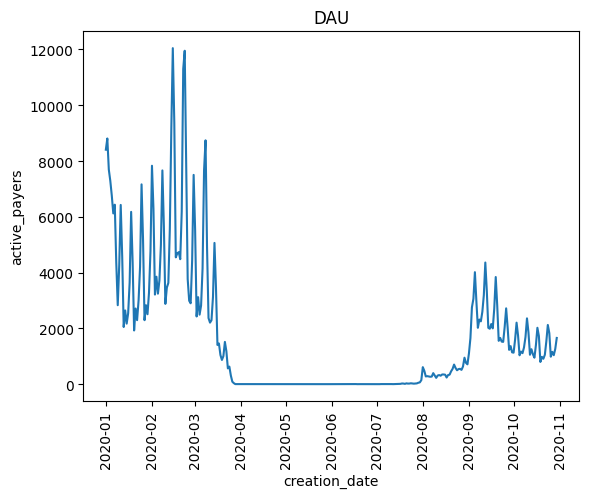

In [500]:
sns.lineplot(data=dau, x='creation_date', y='active_payers')
plt.title('DAU')
plt.xticks(rotation=90);

Интересная просадка с середины весны по конец лета.

In [486]:
# будет столбец с месяцем оформления заказа

df2['creation_month'] = df2['creation_date'].dt.strftime('%m-%Y')

In [497]:
mau = df2 \
    .groupby('creation_month', as_index=False) \
    .client_id \
    .nunique() \
    .rename(columns={'client_id': 'active_payers'})
mau

,creation_month,active_payers
0,01-2020,101483
1,02-2020,122145
2,03-2020,58669
3,04-2020,1
4,05-2020,1
5,06-2020,37
6,07-2020,564
7,08-2020,11023
8,09-2020,59741
9,10-2020,33666


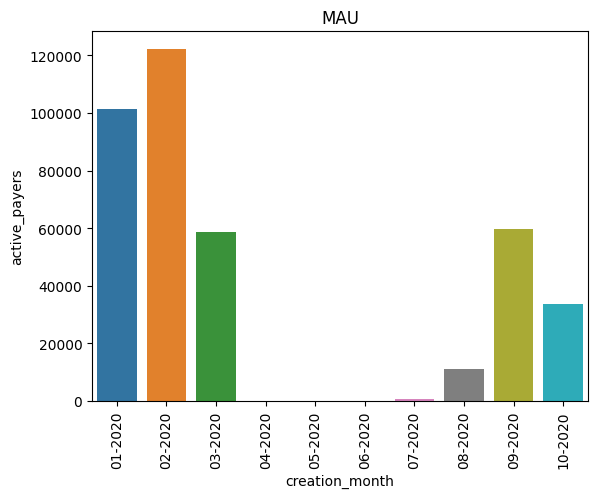

In [499]:
sns.barplot(data=mau, x='creation_month', y='active_payers')
plt.title('MAU')
plt.xticks(rotation=90);

Очень странно, почему так. Возможно, приложение было закрыто с апреля по июль, а возможно мы получили недостоверный датасет.

In [507]:
(revenue / 6).round(2)

8760713.01

Если выкинуть эти 4 месяца простоя, то получится что в среднем мы получаем за месяц 8,76 млн рублей.

Но эту метрику мы сейчас посчитаем чуть детальнее.

In [518]:
# основные метрики по месяцам

pivot_by_month = df2 \
    .groupby('creation_month', as_index=False) \
    .agg({'sales_in_cu': 'sum', 'number_of_tickets': 'sum', 'order_id': 'count', 'client_id': 'nunique'}) \
    .rename(columns={'sales_in_cu': 'revenue', 'number_of_tickets': 'tickets_sold',
                     'order_id': 'total_orders', 'client_id': 'total_clients'}) \
    .sort_values('creation_month')
pivot_by_month['avg_ticket_revenue'] = (pivot_by_month['revenue'] / pivot_by_month['tickets_sold']).round(2)
pivot_by_month['AOV'] = (pivot_by_month['revenue'] / pivot_by_month['total_orders']).round(2)
pivot_by_month['ARPPU'] = (pivot_by_month['revenue'] / pivot_by_month['total_clients']).round(2)
pivot_by_month

,creation_month,revenue,tickets_sold,total_orders,total_clients,avg_ticket_revenue,AOV,ARPPU
0,01-2020,15410803.18,324144,146240,101483,47.54,105.38,151.86
1,02-2020,17493036.42,367874,176089,122145,47.55,99.34,143.22
2,03-2020,6795416.49,151807,72787,58669,44.76,93.36,115.83
3,04-2020,31.65,2,1,1,15.82,31.65,31.65
4,05-2020,47.47,1,1,1,47.47,47.47,47.47
5,06-2020,5601.25,39,38,37,143.62,147.40,151.39
6,07-2020,74267.50,1218,677,564,60.97,109.70,131.68
7,08-2020,1387638.00,28088,14225,11023,49.40,97.55,125.89
8,09-2020,7547420.87,147936,71895,59741,51.02,104.98,126.34
9,10-2020,3850015.23,86684,43318,33666,44.41,88.88,114.36


In [543]:
# основные метрики по кинотеатрам

pivot_by_cinema = df2 \
    .groupby(['cinema_city', 'cinema_name','cinema_latitude', 'cinema_longitude'], as_index=False) \
    .agg({'sales_in_cu': 'sum', 'number_of_tickets': 'sum', 'order_id': 'count', 'client_id': 'nunique'}) \
    .rename(columns={'sales_in_cu': 'revenue', 'number_of_tickets': 'tickets_sold',
                     'order_id': 'total_orders', 'client_id': 'total_clients'})
pivot_by_cinema['avg_ticket_revenue'] = (pivot_by_cinema['revenue'] / pivot_by_cinema['tickets_sold']).round(2)
pivot_by_cinema['AOV'] = (pivot_by_cinema['revenue'] / pivot_by_cinema['total_orders']).round(2)
pivot_by_cinema['ARPPU'] = (pivot_by_cinema['revenue'] / pivot_by_cinema['total_clients']).round(2)
pivot_by_cinema

,cinema_city,cinema_name,cinema_latitude,cinema_longitude,revenue,tickets_sold,total_orders,total_clients,avg_ticket_revenue,AOV,ARPPU
0,Абдулино,Юность (Абдулино),53.690402,53.650894,908.23,30,11,3,30.27,82.57,302.74
1,Адлер,City Stars (Адлер),43.427552,39.926596,89392.15,1816,863,544,49.22,103.58,164.32
2,Алексеевка,Спутник Алексеевка,50.629368,38.695991,338.61,9,3,3,37.62,112.87,112.87
3,Анапа,Мир кино 3D,44.898968,37.325503,2253.17,55,24,20,40.97,93.88,112.66
4,Арзамас,Люмен Фильм (Арзамас),55.394897,43.839725,15716.85,395,174,103,39.79,90.33,152.59
...,...,...,...,...,...,...,...,...,...,...,...
941,Ярославль,Киномакс-Аура,57.626766,39.869322,39208.66,964,481,360,40.67,81.51,108.91
942,Ярославль,Киномакс–Альтаир,57.697846,39.758132,27973.09,763,354,236,36.66,79.02,118.53
943,Ярославль,Киномакс–Аура,57.627228,39.871766,83393.69,2040,945,611,40.88,88.25,136.49
944,Ярославль,Синема Стар (Тутаевское),57.670278,39.838080,16460.40,562,259,192,29.29,63.55,85.73


In [574]:
# зона покрытия, выручка по цветам

fig = px.scatter_geo(pivot_by_cinema, lat='cinema_latitude', lon='cinema_longitude',
                     size_max=3, hover_name='cinema_name', color='revenue',
                    color_continuous_scale='solar',
                    hover_data='cinema_city', center={'lat': 51.35632, 'lon': 81.24545})
fig.show()

In [485]:
df2.head(2)

,order_id,creation_date,session_date,movie_id,movie_name,movie_duration,movie_age_restriction,movie_rating,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fairy_tale,genre_is_science,genre_is_fantasy,genre_is_historical,genre_is_drama,genre_is_animation,genre_is_cartoon,genre_is_documentary,genre_is_adventure,genre_is_fiction,genre_is_childish,genre_is_horror,genre_is_humor,genre_is_western,genre_is_noir,genre_is_detective,genre_is_biography,genre_is_criminal,genre_is_tragicomedy,genre_is_biopic,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,number_of_tickets,places,sales_in_cu,ticket_price_in_cu,cinema_name,cinema_address,cinema_latitude,cinema_longitude,cinema_city,client_id,place_row_0,place_seat_0,place_row_1,place_seat_1,place_row_2,place_seat_2,place_row_3,place_seat_3,place_row_4,place_seat_4,place_row_5,place_seat_5,creation_month
0,2441412,2020-03-07,2020-03-07,32452,Маленькие женщины,135,12+,7.7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,"5, 6, 5, 5",63.29,31.65,Каро 10 Щука,"ул. Щукинская, д. 42",55.809469,37.464571,Москва,12419121665619114461,5,6,5,5,0,0,0,0,0,0,0,0,2020-03-07
1,2169133,2020-02-03,2020-02-04,32452,Маленькие женщины,135,12+,7.7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,"15, 31, 15, 32, 15, 33, 15, 34",189.87,47.47,Каро 11 Октябрь,"ул. Новый Арбат, д. 24",55.753338,37.587615,Москва,8470824369879098013,15,31,15,32,15,33,15,34,0,0,0,0,2020-02-03
